In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
booking = pd.read_csv('mushrooms.csv')
df = booking[["odor", "stalk-root", "veil-color","bruises","stalk-surface-above-ring",
          "stalk-color-below-ring","ring-number","spore-print-color","gill-color"]]

In [3]:
#df['arrival_date_month'] = LabelEncoder().fit_transform(df['arrival_date_month'])
df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,arrival_date_month
0,342,27,1,2,5
1,737,27,1,2,5
2,7,27,1,1,5
3,13,27,1,1,5
4,14,27,1,2,5
...,...,...,...,...,...
119385,23,35,30,2,1
119386,102,35,31,3,1
119387,34,35,31,2,1
119388,109,35,31,2,1


In [4]:
#Dataset info
df.shape

(119390, 5)

In [5]:
df.describe()


,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,arrival_date_month
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,1.856403,5.490544
std,106.863097,13.605138,8.780829,0.579261,3.535075
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,18.000000,16.000000,8.000000,2.000000,2.000000
50%,69.000000,28.000000,16.000000,2.000000,6.000000
75%,160.000000,38.000000,23.000000,2.000000,8.000000
max,737.000000,53.000000,31.000000,55.000000,11.000000


In [6]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['is_inlier_IF'] = iso_forest.fit_predict(df)

In [7]:
inliers_IF = df[df['is_inlier_IF'] == 1]
outliers_IF = df[df['is_inlier_IF'] == -1]

In [8]:
outliers_IF

,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,arrival_date_month,is_inlier_IF
1,737,27,1,2,5,-1
34,45,27,2,3,5,-1
35,40,27,2,3,5,-1
37,36,27,2,3,5,-1
38,43,27,2,3,5,-1
...,...,...,...,...,...,...
119372,175,35,31,1,1,-1
119373,175,35,31,1,1,-1
119376,165,35,29,3,1,-1
119382,135,35,30,3,1,-1


In [9]:
inliers_IF

,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,arrival_date_month,is_inlier_IF
0,342,27,1,2,5,1
2,7,27,1,1,5,1
3,13,27,1,1,5,1
4,14,27,1,2,5,1
5,14,27,1,2,5,1
...,...,...,...,...,...,...
119384,21,35,30,2,1,1
119385,23,35,30,2,1,1
119387,34,35,31,2,1,1
119388,109,35,31,2,1,1


In [10]:
def is_inlier(row):
    # Class and Odor constraint: If odor is 'pungent' (p), class is 'poisonous' (p)
    if row['odor'] == 'p' and row['class'] == 'e':
        return -1

    # If odor is 'foul' (f), class is 'poisonous' (p)
    if row['odor'] == 'f' and row['class'] == 'e':
        return -1

    # If odor is 'fishy' (y), class is 'poisonous' (p)
    if row['odor'] == 'y' and row['class'] == 'e':
        return -1
        
    # if odor is almond (a), class is edible (e)
    if row['odor'] == 'a' and row['class'] == 'p':
        return -1

    # if odor is anise (l), class is edible (e)
    if row['odor'] == 'l' and row['class'] == 'p':
        return -1

    # stalk constraint: if stalk-root is equal (e), veil-color is white (w)
    if row['stalk-root'] == 'e' and row['veil-color'] != 'w':
        return -1

    # Bruises and Stalk Surface constraint: If bruises is 't' (bruises present), stalk-surface-above-ring should be 'smooth' (s) and fibrous (f)
    if row['bruises'] == 't':
        if row['stalk-surface-above-ring'] != 's' and row['stalk-surface-above-ring'] != 'f':
            return -1

    # Stalk constraint: If stalk-color-below-ring is yellow (y) then class is 'poisonous' (p)
    if row['stalk-color-below-ring'] == ['y'] and row['class'] == 'e':
        return -1

    # Ring constraint: If ring numner is null (n) then class is 'poisonous' (p)
    if row['ring-number'] == ['n'] and row['class'] == 'e':
        return -1

    # Veil-color constraint: If veil-color is yellow (y) then class is 'poisonous' (p)
    if row['veil-color'] == ['y'] and row['class'] == 'e':
        return -1

    # Spore-print-color constraint: If spore-print-coloris green (r) then class is 'poisonous' (p)
    if row['spore-print-color'] == ['r'] and row['class'] == 'e':
        return -1

    # Spore-print-color constraint: If spore-print-coloris buff (b) then class is edible (e)
    if row['spore-print-color'] == ['b'] and row['class'] == 'p':
        return -1
        
    # Gill color constraint: If gill-color is 'green' (r), then class is 'poisonous' (p)
    if row['gill-color'] == 'r' and row['class'] == 'e':
        return -1

    # If all constraints are satisfied, return 1
    return 1

In [11]:
#Extracting and analysing through human-written constraints
df['is_inlier_HW'] = df.apply(is_inlier, axis=1)

In [12]:
inliers_HW = df[df['is_inlier_HW'] == 1]
outliers_HW = df[df['is_inlier_HW'] == -1]
outliers_HW

,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,arrival_date_month,is_inlier_IF,is_inlier_HW


In [13]:
#disagreements between two methods
df['similar'] = abs(df['is_inlier_IF'] + df['is_inlier_HW']) / 2

In [14]:
mismatch = df[df['similar'] == 0]
similar = df[df['similar'] == 1]

In [15]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [16]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df['is_inlier_HW'], df['is_inlier_IF'])
conf_matrix

array([[     0,      0],
       [ 11939, 107451]])

Text(95.72222222222221, 0.5, 'Handwritten')

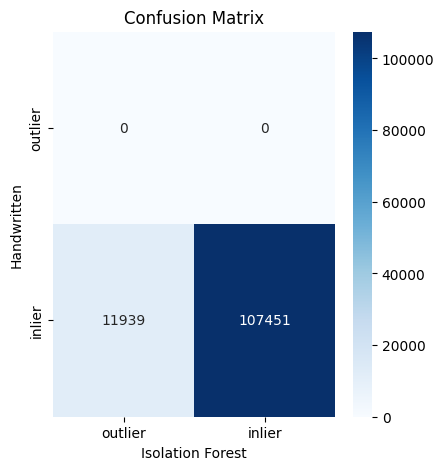

In [17]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [18]:
#Both agree it is inlier
all_inlier = df[(df['is_inlier_IF'] == 1) & (df['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [19]:
#Both agree it is outlier
all_outlier = df[(df['is_inlier_IF'] == -1) & (df['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")